In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/aivle/공모전_새만금/dataset/"

In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
df_traffic = pd.read_csv(path+"새만금개발청_새만금 방조제 교통량_20230831.csv", encoding='euc-kr')
df_event = pd.read_csv(path+"새만금개발청_새만금지역 공연행사_20230830.csv", encoding='euc-kr')
df_festive = pd.read_csv(path+"새만금개발청_새만금지역 축제현황_20230830.csv", encoding='euc-kr')
# df_festive

In [5]:
df_festive

,축제명,축제시작일,축제종료일,장소(지역),주관기관,행사내용,전화번호,비고
0,군산 새만금 해넘이 해맞이,2014-12-31,2015-01-01,군산시 비응항,전라북도 군산시,"일몰일출 감상, 불꽃놀이 등",063-454-3337,NaN
1,군산 꽁당보리축제,2015-05-01,2015-05-05,군산시 미성동 주민센터 앞,꽁당보리축제위원회,"각종 농촌(보리) 체험행사, 보리 홍보전시 및 보리밭 투어",063-454-5231,NaN
2,추억의 보리밭축제,2015-05-09,2015-05-10,김제 망해사 인근 보리밭,진봉면 경관보전 추진위원회,"황금 보리 어울림 한마당, 보리밭 운동회, 지평선 보리밭 가요제 등",063-540-4781,NaN
3,부안마실축제,2015-05-03,2015-05-05,전북 부안군 일원,부안마실축제 제전위원회,"마실퍼레이드, 위도 띠뱃놀이 재현 등",063-580-3934,NaN
4,님의뽕 축제,2015-07-31,2015-08-04,전라북도 부안군 부안댐 광장,부안서림신문사,"부안뽕 관련 홍보, 전시, 홍보, 체험, 시식 및 영화상영, 작은 음악회 등",063-584-7070,NaN
5,하소백련축제,2015-07-17,2015-07-19,하소백련지 청운사 일원,하소백련축제제전위원회,"독립투사 체포 체험, 항일연극, 전통놀이 체험, 각종 공연 등",063-542-8943,NaN
6,김제지평선축제,2015-10-07,2015-10-11,김제 벽골제 일원,지평선축제제전위원회,"쌍용놀이/쌍룡횃불놀이, 세계인농경문화체험, 벽골제횃불퍼레이드",063-540-3031,NaN
7,군산 시간여행축제 2017,2017-09-15,2017-09-17,군산시 근대역사박물관 일원,군산시간여행축제 추진위원회,"체험행사, 근대놀이, 근대유산 순례 등",063-454-3302,NaN
8,군산 꽁당보리축제 2017,2017-05-04,2017-05-07,군산시 미성동 주민센터 앞,미성농업발전협의회,"각종 농촌(보리) 체험행사, 보리 홍보전시 및 보리밭 투어",063-454-5231,NaN
9,2017 김제 추억의 보리밭축제,2017-05-04,2017-05-06,김제 망해사 인근 보리밭,진봉면 경관보전 추진위원회,"황금 보리 어울림 한마당, 보리밭 운동회, 지평선 보리밭 가요제 등",063-540-4781,NaN


In [ ]:
df_festive = df_festive.rename(columns={
    "축제명": "행사명",
    "축제시작일": "행사시작일",
    "축제종료일": "행사종료일",
    "장소(지역)": "행사 장소",
    "주관기관": "주최",
    "행사내용": "행사 내용",
    "전화번호": "문의처"
})

event_all_df = pd.concat([df_festive, df_event], ignore_index=True)
event_all_df["행사시작일"] = pd.to_datetime(event_all_df["행사시작일"], errors='coerce')
event_all_df["연도"] = event_all_df["행사시작일"].dt.year
event_all_df["월"] = event_all_df["행사시작일"].dt.month

monthly_event_count = event_all_df.groupby(["연도", "월"]).size().reset_index(name="행사 수")

df_traffic = df_traffic.rename(columns={
    "조사일 년": "연도",
    "조사월": "월",
    "출발": "출발지",
    "도착지": "도착지",
    "대형 차량": "대형차량",
    "소형 차량": "소형차량"
})
df_traffic["총교통량"] = df_traffic["대형차량"] + df_traffic["소형차량"]
traffic_monthly = df_traffic.groupby(["연도", "월"])[["총교통량"]].sum().reset_index()

merged_df = pd.merge(traffic_monthly, monthly_event_count, on=["연도", "월"], how="left")
merged_df["행사 수"] = merged_df["행사 수"].fillna(0).astype(int)

X = merged_df[["행사 수"]].values
y = merged_df["총교통량"].values
model = LinearRegression().fit(X, y)
merged_df["예측 교통량"] = model.predict(X).round()
merged_df["예측 오차"] = merged_df["총교통량"] - merged_df["예측 교통량"]

prediction_df = merged_df[["연도", "월", "행사 수", "예측 교통량", "총교통량", "예측 오차"]]

### 오차가 들쭉날쭉 하지만 feature를 더 추가하면 (예를 들어, 행사의 영향력에 대한 데이터, 날씨, 관광시즌 등등) 오차를 더 줄여 사용 가능한 데이터로 만들 수 있음
=> 지금 데이터로 행사가 교통량의 변화에 의미가 있음을 증명

In [ ]:
prediction_df

,연도,월,행사 수,예측 교통량,총교통량,예측 오차
0,2022,1,0,134341.0,127284,-7057.0
1,2022,2,0,134341.0,112175,-22166.0
2,2022,3,0,134341.0,109734,-24607.0
3,2022,4,0,134341.0,150445,16104.0
4,2022,5,1,166858.0,201881,35023.0
5,2022,6,0,134341.0,135725,1384.0
6,2022,7,2,199375.0,188723,-10652.0
7,2022,8,2,199375.0,199769,394.0
8,2022,9,1,166858.0,203140,36282.0
9,2022,10,2,199375.0,194807,-4568.0


<ipython-input-34-2193566172>:14: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193566172>:14: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-2193

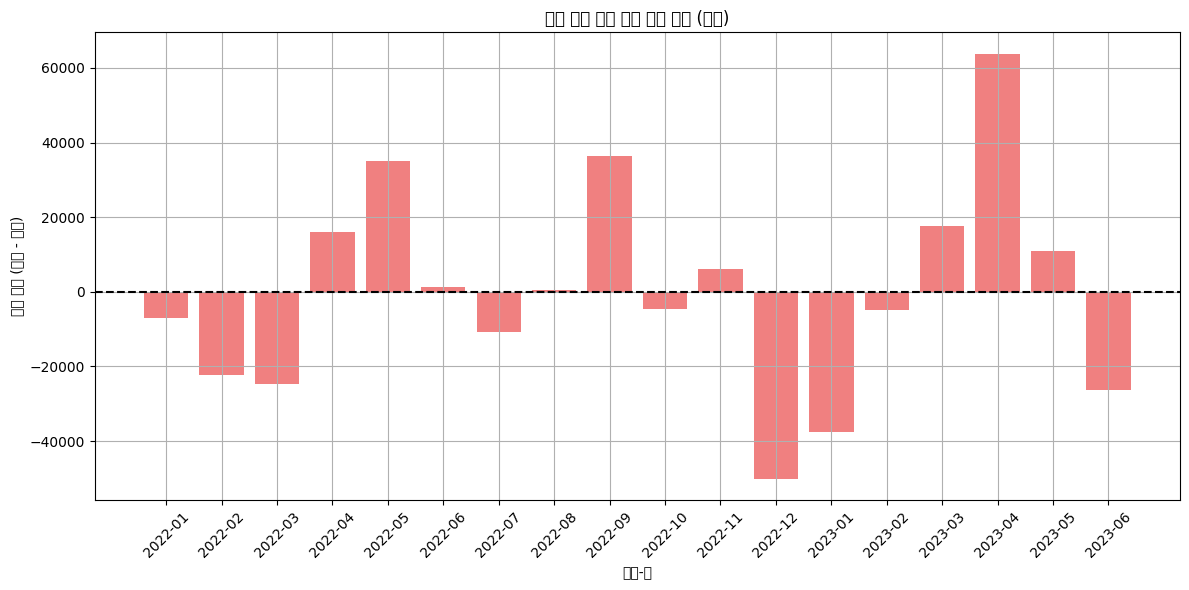

In [ ]:
# 잔차 시각화
plt.figure(figsize=(12, 6))
plt.bar(
    x=merged_df["연도"].astype(str) + "-" + merged_df["월"].astype(str).str.zfill(2),
    height=merged_df["예측 오차"],
    color='lightcoral'
)
plt.axhline(0, color="black", linestyle="--")
plt.title("월별 행사 기반 교통 예측 오차 (잔차)")
plt.xlabel("연도-월")
plt.ylabel("예측 오차 (실제 - 예측)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 교통량 예측과 오차에 따른 축제/행사 영향력 분석

In [ ]:
merged_df["이전월교통량"] = merged_df["총교통량"].shift(1)
merged_df["교통량 변화율(%)"] = ((merged_df["총교통량"] - merged_df["이전월교통량"]) / merged_df["이전월교통량"] * 100).round(1)

def classify_impact(rate):
    if pd.isna(rate):
        return "정보 부족"
    elif rate >= 20:
        return "높음"
    elif rate >= 5:
        return "보통"
    elif rate <= -5:
        return "감소"
    else:
        return "낮음"

merged_df["행사 영향력 등급"] = merged_df["교통량 변화율(%)"].apply(classify_impact)

impact_df = merged_df[["연도", "월", "행사 수", "총교통량", "이전월교통량", "교통량 변화율(%)", "행사 영향력 등급"]]

event_all_df["행사명"] = event_all_df["행사명"].fillna("미상")
monthly_event_titles = event_all_df.groupby(["연도", "월"])["행사명"].apply(lambda x: ", ".join(x.unique())).reset_index(name="행사 목록")

merged_with_titles = pd.merge(merged_df, monthly_event_titles, on=["연도", "월"], how="left")

impact_df = merged_with_titles[[
    "연도", "월", "행사 수", "총교통량",
    "이전월교통량", "교통량 변화율(%)",
    "행사 영향력 등급", "행사 목록"
]]

## 일별 데이터로 행사/축제 근처 몇일을 하면 더 좋았을듯.. 단점이 명확함

In [ ]:
impact_df

,연도,월,행사 수,총교통량,이전월교통량,교통량 변화율(%),행사 영향력 등급,행사 목록
0,2022,1,0,127284,NaN,NaN,정보 부족,NaN
1,2022,2,0,112175,127284.0,-11.9,감소,NaN
2,2022,3,0,109734,112175.0,-2.2,낮음,NaN
3,2022,4,0,150445,109734.0,37.1,높음,NaN
4,2022,5,1,201881,150445.0,34.2,높음,부안마실축제2022(온오프)
5,2022,6,0,135725,201881.0,-32.8,감소,NaN
6,2022,7,2,188723,135725.0,39.0,높음,"제7회 새만금 국제 요트대회, 제7회 새만금 어린이 그림그리기공모전"
7,2022,8,2,199769,188723.0,5.9,보통,"제15회 전국해양스포츠제전, 새만금K-POP페스티벌(온라인)"
8,2022,9,1,203140,199769.0,1.7,낮음,김제지평선축제2022
9,2022,10,2,194807,203140.0,-4.1,낮음,"군산시간여행축제2022, 제1회 새만금 드림컵 요트 대회"
